Name : Gourav Verma<br>
Method : R<br>
Assignment 1.2 - Charts <br>
DSC-640 Week 1-2<br>

In [1]:
# import libraries and data
library(ggplot2)
library(readxl)


Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'readxl' was built under R version 3.6.3"

In [2]:
hotdog_data <- read_excel("hotdog-contest-winners.xlsm")
head(hotdog_data)

Year,Winner,Dogs eaten,Country,New record
<dbl>,<chr>,<dbl>,<chr>,<dbl>
1980,Paul Siederman & Joe Baldini,9.10,United States,0
1981,Thomas DeBerry,11.00,United States,0
1982,Steven Abrams,11.00,United States,0
1983,Luis Llamas,19.50,Mexico,0
1984,Birgit Felden,9.50,Germany,0
1985,Oscar Rodriguez,11.75,United States,0


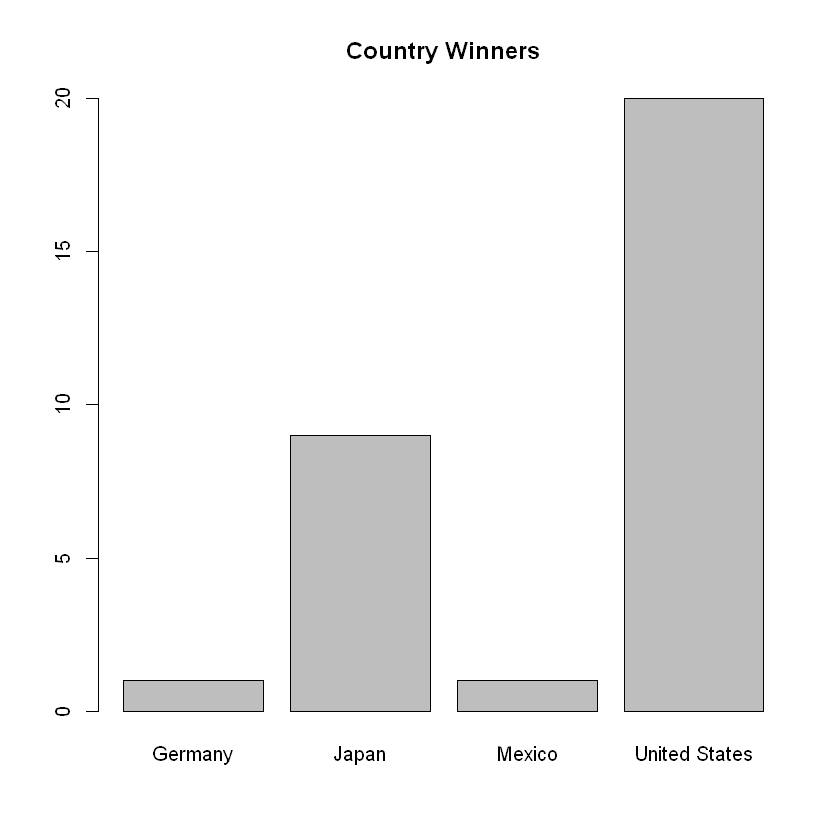

In [3]:
# Bar Chart
counts <- table(hotdog_data$Country)
barplot(counts, main='Country Winners')

Warning message:
"Use of `hotdog_data$Country` is discouraged. Use `Country` instead."Warning message:
"Use of `hotdog_data$`Dogs eaten`` is discouraged. Use `Dogs eaten` instead."Warning message:
"Use of `hotdog_data$Year` is discouraged. Use `Year` instead."

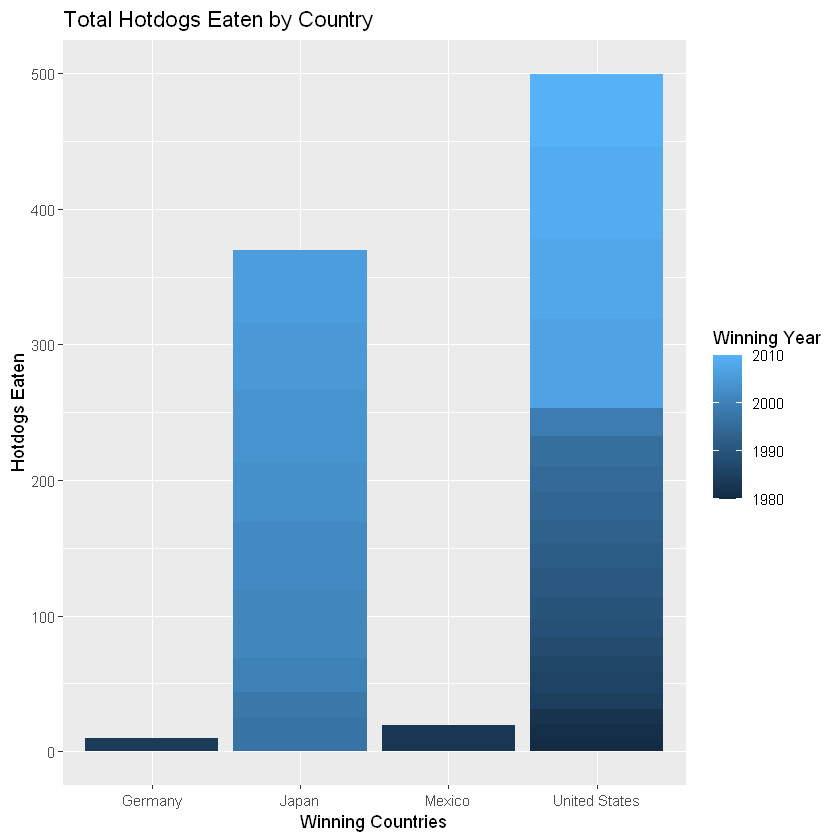

In [4]:
# Stacked Bar Chart
ggplot2::ggplot(hotdog_data, 
                ggplot2::aes(fill=hotdog_data$Year, y = hotdog_data$`Dogs eaten`, x= hotdog_data$Country)) + 
ggplot2::geom_bar(position = "stack", stat = "identity") + 
ggplot2::ggtitle('Total Hotdogs Eaten by Country') + 
ggplot2::xlab('Winning Countries') + 
ggplot2::ylab('Hotdogs Eaten') + 
ggplot2::labs(fill='Winning Year')


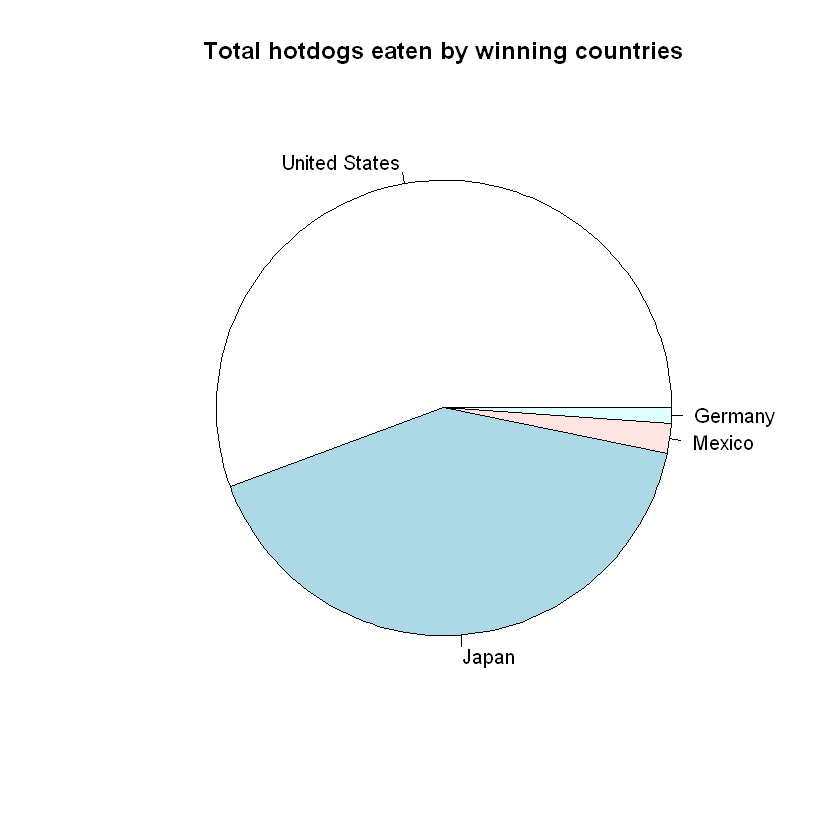

In [5]:
# Pie Chart
slices <- c(499.85, 369.88, 19.50, 9.50)
lbls <- c('United States', 'Japan', 'Mexico', 'Germany')
pie(slices, labels = lbls, main='Total hotdogs eaten by winning countries')

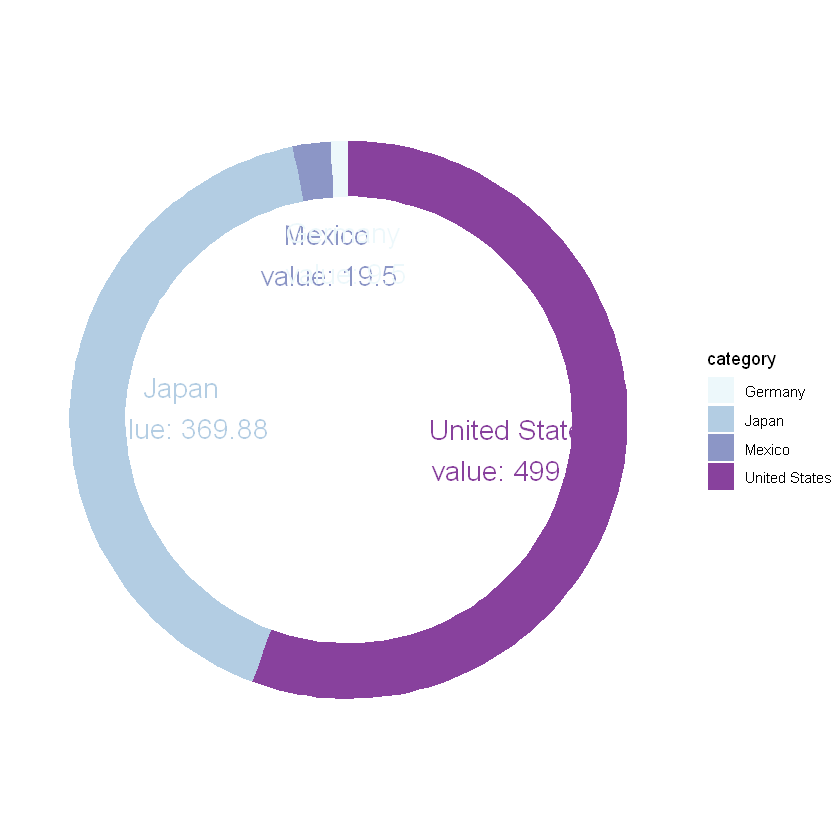

In [6]:
# Donut Pie Chart
data <- data.frame(category=c('United States', 'Japan', 'Mexico', 'Germany'), count=c(499.85, 369.88, 19.50, 9.50))
data$fraction <- data$count / sum(data$count)
data$ymax <- cumsum(data$fraction)
data$ymin <- c(0, head(data$ymax, n=-1))
data$labelPosition <- (data$ymax + data$ymin) / 2
data$label <- paste0(data$category, "\n value: ", data$count)


ggplot2::ggplot(data, ggplot2::aes(ymax=ymax, ymin=ymin, xmax=4, xmin=3, fill=category)) + 
ggplot2::geom_rect() + 
ggplot2::geom_text(x=2, ggplot2::aes(y=labelPosition, label=label, color=category), size=6) + 
ggplot2::scale_fill_brewer(palette=3) + ggplot2::scale_color_brewer(palette = 3) + 
ggplot2::coord_polar(theta = "y") + 
ggplot2::xlim(c(-1,4)) + 
ggplot2::theme_void() 
